# GAIA DR2


 _____________________
< oh my so much data! >
 ---------------------
        \   ^__^
         \  (oo)\_______
            (__)\       )\/\
                ||----- |
                ||     ||
                


In [ ]:
%%time

qry = """
SELECT *
  
FROM gaiadr2.gaia_source AS gs
WHERE gs.radial_velocity IS NOT NULL
"""

df = Gaia.launch_job_async(qry).get_results().to_pandas()

dask

In [3]:
%%time

rv_files = glob.glob('/scratch/rag394/gaia/cdn.gea.esac.esa.int/Gaia/gdr2/gaia_source_with_rv/csv/*.csv')

file_list = []
for file_ in rv_files:
    
    print('concatenating file: ',file_)
    frame = pd.read_csv(file_,index_col=None)
    file_list.append(frame)
    
df = pd.concat(file_list)

concatenating file:  /scratch/rag394/gaia/cdn.gea.esac.esa.int/Gaia/gdr2/gaia_source_with_rv/csv/GaiaSource_5502601873595430784_5933051501826387072.csv
concatenating file:  /scratch/rag394/gaia/cdn.gea.esac.esa.int/Gaia/gdr2/gaia_source_with_rv/csv/GaiaSource_3650805523966057472_4475721411269270528.csv
concatenating file:  /scratch/rag394/gaia/cdn.gea.esac.esa.int/Gaia/gdr2/gaia_source_with_rv/csv/GaiaSource_5933051914143228928_6714230117939284352.csv
concatenating file:  /scratch/rag394/gaia/cdn.gea.esac.esa.int/Gaia/gdr2/gaia_source_with_rv/csv/GaiaSource_1584380076484244352_2200921635402776448.csv
concatenating file:  /scratch/rag394/gaia/cdn.gea.esac.esa.int/Gaia/gdr2/gaia_source_with_rv/csv/GaiaSource_6714230465835878784_6917528443525529728.csv
concatenating file:  /scratch/rag394/gaia/cdn.gea.esac.esa.int/Gaia/gdr2/gaia_source_with_rv/csv/GaiaSource_4475722064104327936_5502601461277677696.csv
concatenating file:  /scratch/rag394/gaia/cdn.gea.esac.esa.int/Gaia/gdr2/gaia_source_wit

In [4]:
df.to_csv('/scratch/rag394/DR2_rv_complete.csv')
df.set_index('source_id',inplace=True)

In [ ]:
df['distance'] = 1000./df['parallax']

In [122]:
data = df.sample(600000)

(600000, 94)

In [ ]:
data.to_csv('/scratch/rag394/DR2_rv_subsample.csv')

In [123]:
ra = data.ra.values
dec = data.dec.values

ra = coord.Angle(ra*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(dec*u.degree)

/home/rag394/.local/lib/python3.6/site-packages/matplotlib/projections/geo.py:426: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(y / np.sqrt(2))


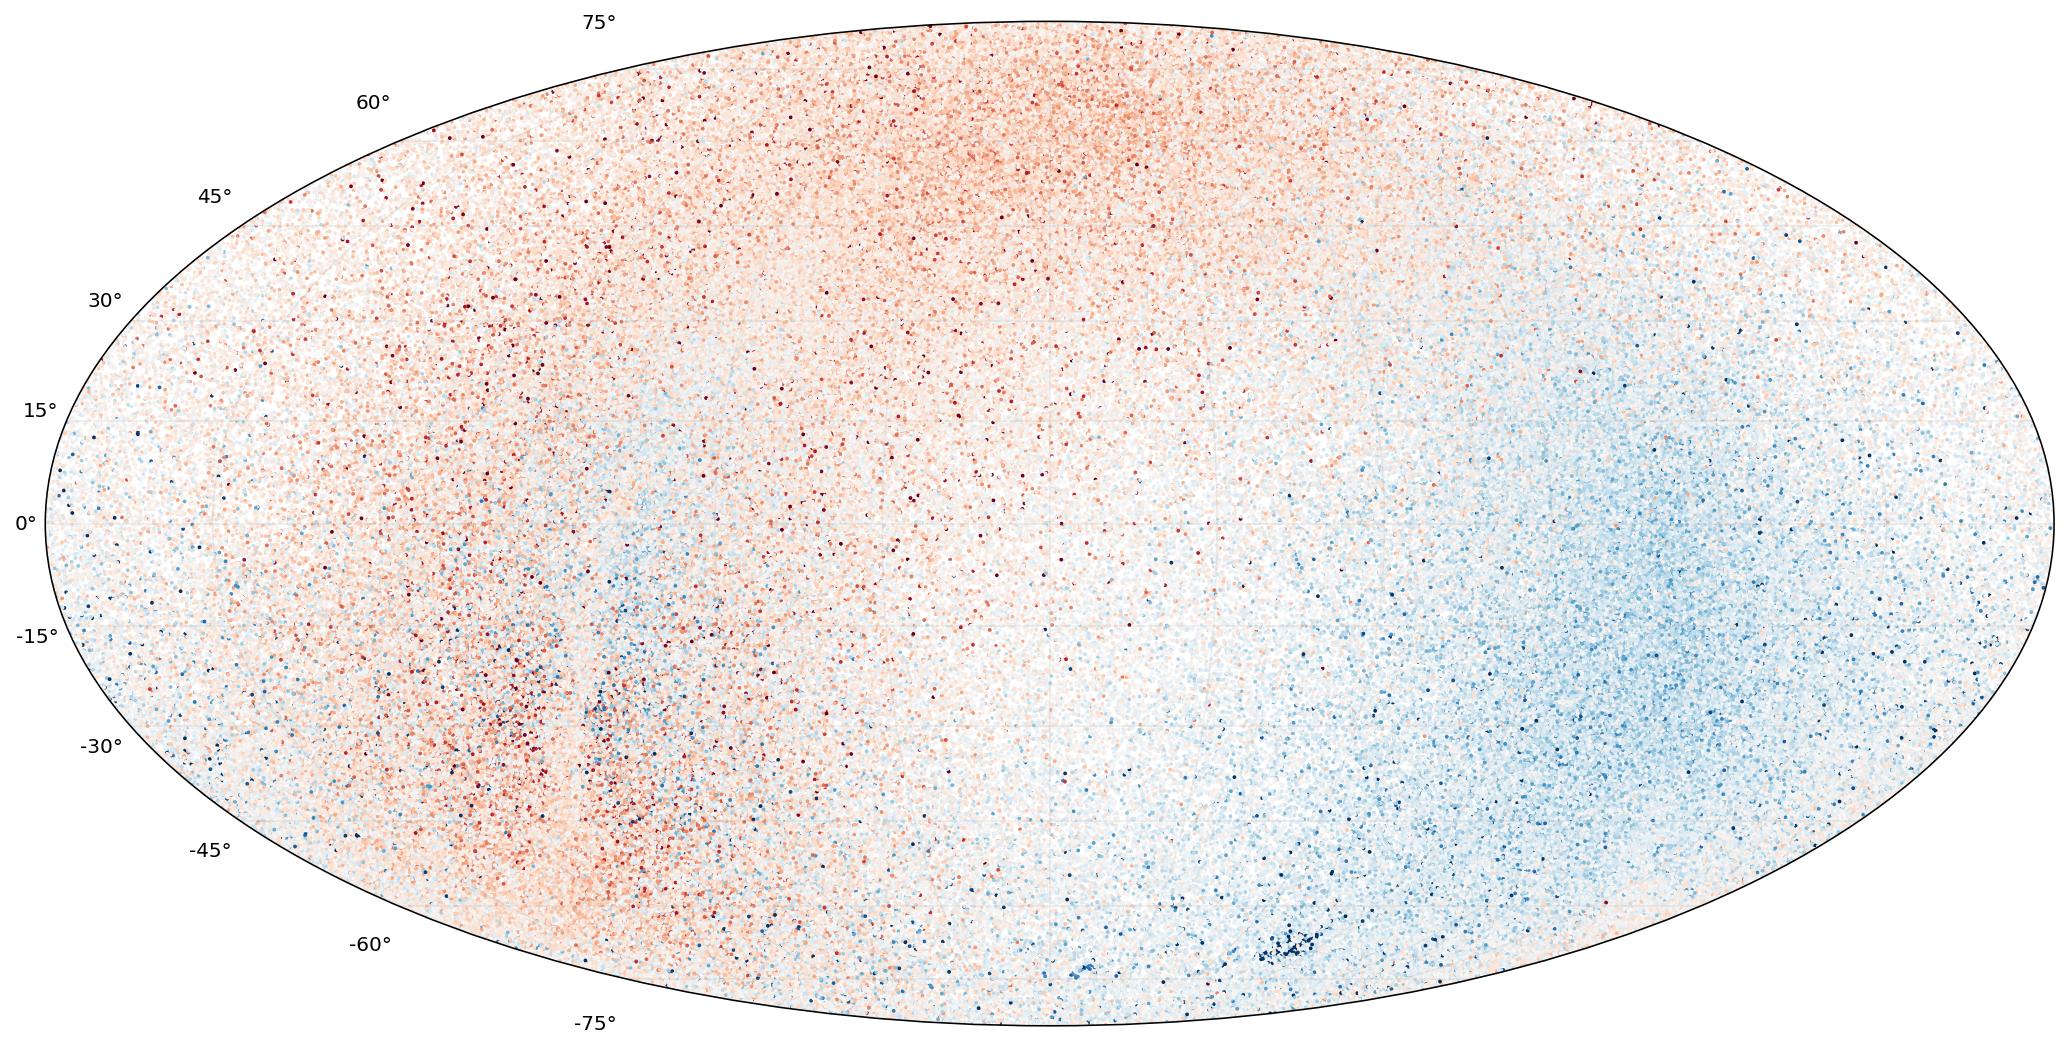

In [131]:
fig = plt.figure(figsize=(18,14))
ax = fig.add_subplot(111,projection='mollweide')

s = ax.scatter(ra.radian,dec.radian,c=data.radial_velocity+data.radial_velocity.mean(),cmap='RdBu',
               vmin=-200, vmax=200,s=.9)

ax.grid(alpha=0.2)

#plt.colorbar(s)
ax.set_xticklabels([]);

In [133]:
data.columns

Index(['solution_id', 'designation', 'random_index', 'ref_epoch', 'ra',
       'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error',
       'parallax_over_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
       'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr',
       'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr',
       'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr',
       'astrometric_n_obs_al', 'astrometric_n_obs_ac',
       'astrometric_n_good_obs_al', 'astrometric_n_bad_obs_al',
       'astrometric_gof_al', 'astrometric_chi2_al', 'astrometric_excess_noise',
       'astrometric_excess_noise_sig', 'astrometric_params_solved',
       'astrometric_primary_flag', 'astrometric_weight_al',
       'astrometric_pseudo_colour', 'astrometric_pseudo_colour_error',
       'mean_varpi_factor_al', 'astrometric_matched_observations',
       'visibility_periods_used', 'astrometric_sigma5d_max',
       'frame_rotator_object_type', 'matched_obs

# Includes, etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
import glob

import astropy.coordinates as coord
import astropy.units as u

import torch
import torch.nn as nn
from torch.autograd import Variable

cmap=plt.cm.tab10
c = cycler('color', cmap(np.linspace(0,1,10)))
plt.rcParams["axes.prop_cycle"] = c

from astroquery.gaia import Gaia

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
Gaia.login(user='',password='')